In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
# Need to remove the column unnamed as it is not needed:
df=df.iloc[:,1:]

In [6]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


## STEPS TO FOLLOW:


### Step1: Remove the unnecesaary columns by preprocessing + EDA + Featire Columns

### Step2: Extract Input output columns

### Step3: Scale the values

### Step4: Train Test split

### Step5: Train the model

### Step6: Evaluate the model/model selection

### Step7: Deploy the model

In [7]:
# EDA:

import matplotlib.pyplot as plt

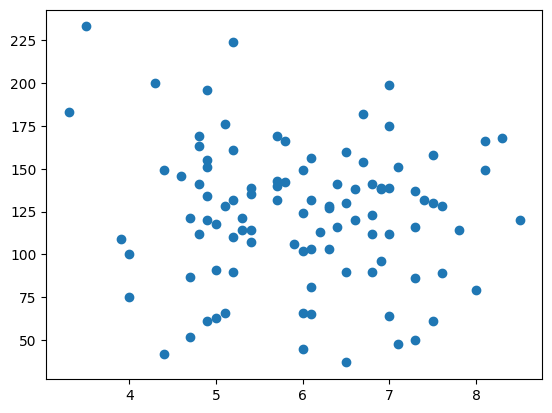

In [8]:
plt.scatter(df['cgpa'],df['iq'])

# Shows the destribution of the data in a scatter plot:
# We can see that low cgpa but high IQ a mad genious may be.

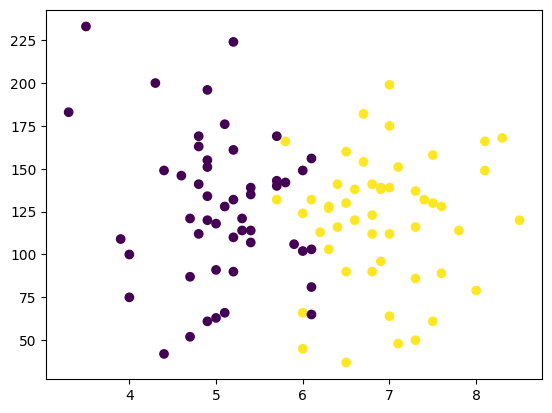

In [9]:
# To show whi got placed and who doesnt:

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# Yollow are placed.

In [10]:
# Need to make a ML model who can predict the reason or equation who will get placed: Using logistic regression.
# EDA: This data is linear hence can be seperated by single line hence logistic regression can be used.

# Step2: Seperate the input and output values:

# Here in the tables input are cgpa and iq and output is placement.

# Now input variables are also called as INDEPENDENT VARIABLE. As we assune that there is no relation between both the input variable.
# Output variables are called as dependent variables as this is dependent on the input variables.

# Seperating the input and output columns:

X=df.iloc[:,0:2]

# Will have all the rows but the columns will come 0 and 1 2 will be OMITTED.


In [11]:
Y=df.iloc[:,-1]

# Here we need the last column only hence we use -1.

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [14]:
X.shape

# 2 D tensor: matrix: collection of vectors: 100 vectors

(100, 2)

In [15]:
Y.shape

# 1 D tensor: vector: collectionof scalar

(100,)

In [16]:
# Step4: Train test split: To show the different values which gets splitted then do the scalling.

from sklearn.model_selection import train_test_split

# Here from the package we need a function called as train_test_split(ip_variable_dataframe,op_variable_dataframe,test_size=value)

# testsize is a value which shows how much value is needed to be send in test data will be PROVIDED in DECIMAL FORMAT. 0.1=10%

In [17]:
train_test_split(X,Y,test_size=0.1)

[    cgpa     iq
 44   7.5   61.0
 35   6.8   90.0
 55   7.8  114.0
 71   6.1  132.0
 63   6.3  128.0
 ..   ...    ...
 8    6.1  156.0
 56   6.1   65.0
 13   6.4  116.0
 21   7.1  151.0
 83   7.5  130.0
 
 [90 rows x 2 columns],
     cgpa     iq
 48   6.6  138.0
 52   7.0  175.0
 62   6.0  102.0
 17   3.3  183.0
 45   6.0   66.0
 29   7.0  112.0
 19   5.2  132.0
 76   4.9  155.0
 49   5.4  135.0
 66   6.9   96.0,
 44    1
 35    1
 55    1
 71    1
 63    1
      ..
 8     0
 56    0
 13    1
 21    1
 83    1
 Name: placement, Length: 90, dtype: int64,
 48    1
 52    1
 62    0
 17    0
 45    1
 29    1
 19    0
 76    0
 49    0
 66    1
 Name: placement, dtype: int64]

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [19]:
X_train

,cgpa,iq
2,5.3,121.0
8,6.1,156.0
84,5.7,169.0
11,6.9,138.0
9,5.1,66.0
...,...,...
67,5.0,118.0
22,4.9,120.0
3,7.4,132.0
45,6.0,66.0


In [20]:
X_test

,cgpa,iq
98,6.3,103.0
31,3.9,109.0
99,6.2,113.0
87,5.7,132.0
7,5.0,63.0
42,7.6,89.0
10,6.0,45.0
59,4.8,112.0
76,4.9,155.0
15,5.1,176.0


In [21]:
Y_train

2     0
8     0
84    0
11    1
9     0
     ..
67    0
22    0
3     1
45    1
16    0
Name: placement, Length: 90, dtype: int64

In [22]:
Y_test

98    1
31    0
99    1
87    1
7     0
42    1
10    1
59    0
76    0
15    0
Name: placement, dtype: int64

In [23]:
# Step3: Scaling: After scaling all the values will be in between 0 to 1 and it will be convtered into an array hence row number cannot be seen due to which we need to do train test split first.

from sklearn.preprocessing import StandardScaler

# Here StandardScalar is a class for which we need to create an object.

In [24]:
scaler=StandardScaler()

# Scaler will scale that is will bring the value between 0 to 1 for all the INPUT columns or INPUT FEATURES.

In [25]:
X_train=scaler.fit_transform(X_train)

In [26]:
X_train

# All are between o and 1 now.

array([[-0.64710108, -0.10377304],
       [ 0.05246765,  0.77731882],
       [-0.29731671,  1.10458151],
       [ 0.75203639,  0.32418586],
       [-0.82199326, -1.48834596],
       [-1.78390027, -1.26177948],
       [-0.73454717, -0.38068762],
       [-0.20987062,  1.02905935],
       [-0.99688544,  0.65144855],
       [ 0.48969811,  0.32418586],
       [ 1.97628167,  1.07940745],
       [-0.29731671,  0.37453397],
       [ 0.6645903 , -0.33033952],
       [-0.99688544,  0.22348965],
       [ 0.40225202, -2.2183935 ],
       [ 0.31480593, -0.22964331],
       [-0.73454717, -0.88416869],
       [ 0.48969811, -0.12894709],
       [ 0.83948248, -1.53869407],
       [ 1.36415903,  0.07244533],
       [-1.17177763, -0.10377304],
       [-0.90943935, -0.85899463],
       [-0.03497844,  0.60110044],
       [ 1.71394339, -1.16108327],
       [-1.08433153,  1.10458151],
       [-0.55965499,  0.34935991],
       [ 1.10182075, -0.9848649 ],
       [ 0.05246765,  0.17314154],
       [ 0.31480593,

In [27]:
X_test=scaler.fit_transform(X_test)

In [28]:
X_test

array([[ 0.76447079, -0.18034422],
       [-1.68183573, -0.01884193],
       [ 0.66254135,  0.08882626],
       [ 0.15289416,  0.60025015],
       [-0.56061191, -1.2570261 ],
       [ 2.08955348, -0.55718288],
       [ 0.45868247, -1.74153295],
       [-0.76447079,  0.06190921],
       [-0.66254135,  1.21934224],
       [-0.45868247,  1.78460023]])

In [29]:
# Train the model:

# Now here we are using logistic regression:

from sklearn.linear_model import LogisticRegression

In [30]:
# Creating an object from logistic regression:

clf= LogisticRegression()

In [31]:
# Model Train:

clf.fit(X_train,Y_train)

LogisticRegression()

In [32]:
# Evaluate the model:

# Here we calculate the accuracy:

y_pred=clf.predict(X_test)

# This is 10 percent values hence our model is predicting the values here.That is it is predicting the result which will come and how much it is allined to Y_test.

In [33]:
Y_test

98    1
31    0
99    1
87    1
7     0
42    1
10    1
59    0
76    0
15    0
Name: placement, dtype: int64

In [34]:
# To find the accuracy that is how much correctly my model is predicting we need to calculate the accuracy score.

from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(Y_test,y_pred)

# This shows 100 % accuracy.

1.0

In [36]:
clf.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [37]:
# Now how to chwck the decision boundaries:

# Which pattern os noticed by my model to reach to this accucracy:

# Here we can see that the model is using linear regression hence a single line will be drawn to segregate the points:

from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

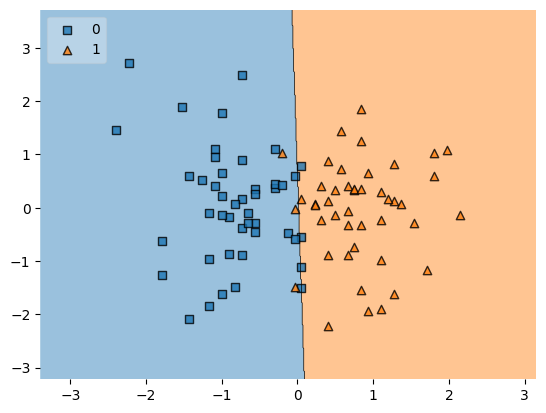

In [38]:
plot_decision_regions(X_train,Y_train.values,clf=clf,legend=2)

# The parameters can only have array values and X_train is standardized and Y_train was not hence values is used.

In [39]:
# Deploying the models:

# After completing tha above steps iif we are satisfied with our model then we deploy it. For that here we use a pickle library.

import pickle 

In [40]:
pickle.dump(clf,open('model.pkl','wb'))

# Here we are taking our model 'clf' and converting ot to a file 'model.pkl' with a write option 'wb'.

# This can be used to be deployed in a website as this have the predict function.

# After the website is ready we can deploy the model in the servies heruko AWS and GCP.